# Exploratory Data Analysis (EDA) of the House Prices - Advanced Regression Techniques Dataset

The House Prices - Advanced Regression Techniques dataset, provided by Kaggle, is a comprehensive collection of 79 explanatory variables describing residential homes in Ames, Iowa. The primary objective of this dataset is to **predict the final price of each home** based on these variables. As a data scientist, my goal is to perform an in-depth Exploratory Data Analysis (EDA) to gain insights into the dataset, identify potential correlations, and understand the relationships between the variables.

This EDA will involve a thorough examination of the dataset's structure, including:

* **Data types and distributions**: Understanding the nature of the variables, including continuous, categorical, and ordinal variables.
* **Correlation analysis**: Investigating the relationships between variables to identify potential correlations and dependencies.
* **Missing value analysis**: Identifying and addressing missing values to ensure data quality.
* **Data visualization**: Creating visualizations to illustrate the distribution of variables, identify patterns, and understand the relationships between variables.

By performing this EDA, I aim to provide a solid foundation for further analysis and modeling, ultimately informing the development of an accurate and reliable house price prediction model.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TRAIN_CSV_FILE = '../dataset/train.csv'
df_full = pd.read_csv(TRAIN_CSV_FILE)

## Column Analysis

In [3]:
import re

# Function to convert camelCase or PascalCase to snake_case
def to_snake_case(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

df_full.columns = [to_snake_case(col) for col in df_full.columns]


In [4]:
df_full.head(5)

id  ms_sub_class ms_zoning  lot_frontage  lot_area street alley lot_shape  \
0   1            60        RL          65.0      8450   Pave   NaN       Reg   
1   2            20        RL          80.0      9600   Pave   NaN       Reg   
2   3            60        RL          68.0     11250   Pave   NaN       IR1   
3   4            70        RL          60.0      9550   Pave   NaN       IR1   
4   5            60        RL          84.0     14260   Pave   NaN       IR1   

  land_contour utilities  ... pool_area pool_qc fence misc_feature misc_val  \
0          Lvl    AllPub  ...         0     NaN   NaN          NaN        0   
1          Lvl    AllPub  ...         0     NaN   NaN          NaN        0   
2          Lvl    AllPub  ...         0     NaN   NaN          NaN        0   
3          Lvl    AllPub  ...         0     NaN   NaN          NaN        0   
4          Lvl    AllPub  ...         0     NaN   NaN          NaN        0   

  mo_sold yr_sold  sale_type  sale_condition  sale_price  
0       2    2008         WD          Normal      208500  
1       5    2007         WD          Normal      181500  
2       9    2008         WD          Normal      223500  
3       2    2006         WD         Abnorml      140000  
4      12    2008         WD          Normal      250000  

[5 rows x 81 columns]

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1460 non-null   int64  
 1   ms_sub_class     1460 non-null   int64  
 2   ms_zoning        1460 non-null   object 
 3   lot_frontage     1201 non-null   float64
 4   lot_area         1460 non-null   int64  
 5   street           1460 non-null   object 
 6   alley            91 non-null     object 
 7   lot_shape        1460 non-null   object 
 8   land_contour     1460 non-null   object 
 9   utilities        1460 non-null   object 
 10  lot_config       1460 non-null   object 
 11  land_slope       1460 non-null   object 
 12  neighborhood     1460 non-null   object 
 13  condition1       1460 non-null   object 
 14  condition2       1460 non-null   object 
 15  bldg_type        1460 non-null   object 
 16  house_style      1460 non-null   object 
 17  overall_qual  

### Summary of our data columns

- **MSSubClass** (int64): Type of dwelling involved in the sale (e.g., one-story houses, two-story houses, etc.).
- **MSZoning** (object): General zoning classification of the sale (e.g., Agriculture, Commercial, High-Density Residential, etc.).
- **LotFrontage** (float64): Linear feet of street connected to the property.
- **LotArea** (int64): Lot size in square feet.
- **Street** (object): Type of road access to the property (Gravel, Paved).
- **Alley** (object): Type of alley access (Gravel, Paved, No access).
- **LotShape** (object): General shape of the property (Regular, Irregular).
- **LandContour** (object): Flatness of the property (Level, Hill, Depression).
- **Utilities** (object): Type of utilities available (e.g., All public utilities, No sewer, etc.).
- **LotConfig** (object): Lot configuration (e.g., Inside lot, Corner lot, Cul-de-sac).
- **LandSlope** (object): Slope of the property (Gentle, Moderate, Severe).
- **Neighborhood** (object): Physical locations within Ames city limits (e.g., Bloomington Heights, College Creek, etc.).
- **Condition1** (object): Proximity to various conditions (e.g., Near main road, Near railroad, Normal).
- **Condition2** (object): Proximity to other conditions (if more than one).
- **BldgType** (object): Type of dwelling (e.g., Single-family, Duplex, Townhouse).
- **HouseStyle** (object): Style of dwelling (e.g., One-story, Two-story, Split-level).
- **OverallQual** (int64): Overall quality rating of the house materials and finish (1-10, from Very Poor to Very Excellent).
- **OverallCond** (int64): Overall condition rating of the house (1-10, from Very Poor to Very Excellent).
- **YearBuilt** (int64): Original construction year.
- **YearRemodAdd** (int64): Year of remodeling (same as construction year if no remodeling).
- **RoofStyle** (object): Type of roof (e.g., Gable, Flat, Hip).
- **RoofMatl** (object): Roof material (e.g., Composite shingles, Metal, Wood).
- **Exterior1st** (object): Primary exterior covering of the house (e.g., Vinyl, Wood, Stucco).
- **Exterior2nd** (object): Secondary exterior covering, if exists.
- **MasVnrType** (object): Type of masonry veneer (e.g., Brick, Stone, None).
- **MasVnrArea** (float64): Area of masonry veneer in square feet.
- **ExterQual** (object): Quality of the exterior material (Excellent, Good, Typical, Fair, Poor).
- **ExterCond** (object): Current condition of the exterior material.
- **Foundation** (object): Type of foundation (e.g., Concrete block, Slab, Wood).
- **BsmtQual** (object): Height of the basement.
- **BsmtCond** (object): General condition of the basement.
- **BsmtExposure** (object): Basement exposure (e.g., Good exposure, No exposure).
- **BsmtFinType1** (object): Type of finished area in the basement.
- **BsmtFinSF1** (float64): Square feet of type 1 finished area in the basement.
- **BsmtFinType2** (object): Type of secondary finished area in the basement (if exists).
- **BsmtFinSF2** (float64): Square feet of type 2 finished area in the basement.
- **BsmtUnfSF** (float64): Square feet of unfinished area in the basement.
- **TotalBsmtSF** (float64): Total square feet of basement area.
- **Heating** (object): Type of heating (e.g., Forced air gas, Wall).
- **HeatingQC** (object): Quality and condition of heating.
- **CentralAir** (object): Central air conditioning (Yes or No).
- **Electrical** (object): Electrical system (e.g., Standard circuit breakers, Fuse box).
- **1stFlrSF** (int64): Square feet of the first floor.
- **2ndFlrSF** (int64): Square feet of the second floor.
- **LowQualFinSF** (int64): Square feet of low-quality finished area (all floors).
- **GrLivArea** (int64): Above ground living area square feet.
- **BsmtFullBath** (float64): Full bathrooms in the basement.
- **BsmtHalfBath** (float64): Half bathrooms in the basement.
- **FullBath** (int64): Full bathrooms above ground.
- **HalfBath** (int64): Half bathrooms above ground.
- **BedroomAbvGr** (int64): Bedrooms above ground (does not include basement bedrooms).
- **KitchenAbvGr** (int64): Kitchens above ground.
- **KitchenQual** (object): Kitchen quality (Excellent, Good, Typical, Fair, Poor).
- **TotRmsAbvGrd** (int64): Total rooms above ground (does not include bathrooms).
- **Functional** (object): Functionality of the house (assumes typical).
- **FireplaceQu** (object): Fireplace quality.
- **GarageType** (object): Type of garage.
- **GarageYrBlt** (float64): Year garage was built.
- **GarageFinish** (object): Interior finish of the garage.
- **GarageCars** (float64): Size of garage in car capacity.
- **GarageArea** (float64): Size of garage in square feet.
- **GarageQual** (object): Garage quality.
- **GarageCond** (object): Garage condition.
- **PavedDrive** (object): Paved driveway (Yes or No).
- **WoodDeckSF** (int64): Wood deck area in square feet.
- **OpenPorchSF** (int64): Open porch area in square feet.
- **EnclosedPorch** (int64): Enclosed porch area in square feet.
- **3SsnPorch** (int64): Three season porch area in square feet.
- **ScreenPorch** (int64): Screen porch area in square feet.
- **PoolArea** (int64): Pool area in square feet.
- **PoolQC** (object): Pool quality.
- **Fence** (object): Fence quality.
- **MiscFeature** (object): Miscellaneous feature not covered in other categories.
- **MiscVal** (int64): Value of miscellaneous feature.
- **MoSold** (int64): Month sold.
- **YrSold** (int64): Year sold.
- **SaleType** (object): Type of sale.
- **SaleCondition** (object): Condition of sale.
- **SalePrice** (float64): Sale price.
- **source** (object): Source of the data.

## Null values

In [6]:
n_rows, n_columns = df_full.shape
print("number of cols: ", n_columns)
print("number of rows: ", n_rows)

number of cols:  81
number of rows:  1460


In [7]:
number_nulls = df_full.isnull().sum()
number_nulls

id                  0
ms_sub_class        0
ms_zoning           0
lot_frontage      259
lot_area            0
                 ... 
mo_sold             0
yr_sold             0
sale_type           0
sale_condition      0
sale_price          0
Length: 81, dtype: int64

In [8]:
percent_nulls = number_nulls / n_rows * 100
percent_nulls

id                 0.000000
ms_sub_class       0.000000
ms_zoning          0.000000
lot_frontage      17.739726
lot_area           0.000000
                    ...    
mo_sold            0.000000
yr_sold            0.000000
sale_type          0.000000
sale_condition     0.000000
sale_price         0.000000
Length: 81, dtype: float64

In [9]:
# filter percent nulls > 0
columns_with_nulls = percent_nulls[percent_nulls > 0]
columns_with_nulls

lot_frontage      17.739726
alley             93.767123
mas_vnr_type      59.726027
mas_vnr_area       0.547945
bsmt_qual          2.534247
bsmt_cond          2.534247
bsmt_exposure      2.602740
bsmt_fin_type1     2.534247
bsmt_fin_type2     2.602740
electrical         0.068493
fireplace_qu      47.260274
garage_type        5.547945
garage_yr_blt      5.547945
garage_finish      5.547945
garage_qual        5.547945
garage_cond        5.547945
pool_qc           99.520548
fence             80.753425
misc_feature      96.301370
dtype: float64

## removing unusefull columns

In [10]:
df_full = df_full.drop(columns=["id", "alley", "pool_qc", "fence", "misc_feature", "mas_vnr_type", "fireplace_qu", "lot_frontage"])
df_full.dropna(inplace=True)

## Target column

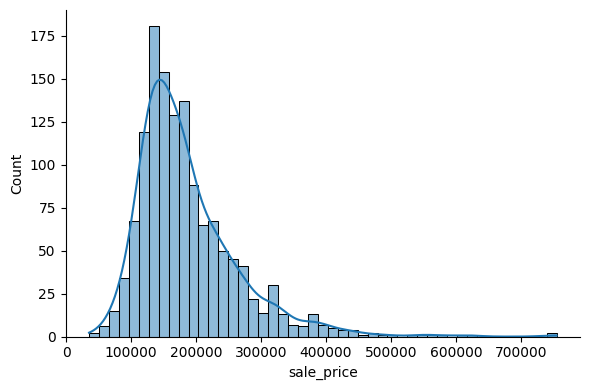

In [11]:
sns.displot(x=df_full['sale_price'],kde=True,height=4,aspect=1.5);

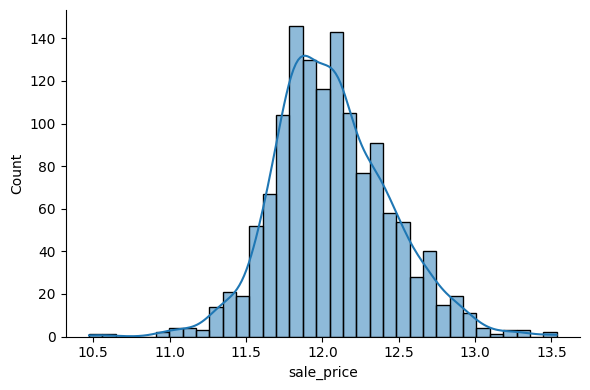

In [12]:
sns.displot(x=np.log1p(df_full['sale_price']),kde=True,height=4,aspect=1.5);

In [13]:
df_full['sale_price'] = np.log1p(df_full['sale_price'])

In [14]:
df_full['sale_price'].describe()

count    1338.000000
mean       12.063498
std         0.376846
min        10.471978
25%        11.813037
50%        12.034697
75%        12.301387
max        13.534474
Name: sale_price, dtype: float64

## Categorical data

In [15]:
categorical_columns = df_full.select_dtypes(include=['object', 'category']).columns.values
numerical_columns = df_full.select_dtypes(include=['number']).columns.values

In [16]:
print("CATEGORIAL COLUMNS: ", len(categorical_columns))
print(*categorical_columns, sep='\n')

CATEGORIAL COLUMNS:  37
ms_zoning
street
lot_shape
land_contour
utilities
lot_config
land_slope
neighborhood
condition1
condition2
bldg_type
house_style
roof_style
roof_matl
exterior1st
exterior2nd
exter_qual
exter_cond
foundation
bsmt_qual
bsmt_cond
bsmt_exposure
bsmt_fin_type1
bsmt_fin_type2
heating
heating_qc
central_air
electrical
kitchen_qual
functional
garage_type
garage_finish
garage_qual
garage_cond
paved_drive
sale_type
sale_condition


In [17]:
print("NUMERICAL COLUMNS: ", len(numerical_columns))
print(*numerical_columns, sep='\n')

NUMERICAL COLUMNS:  36
ms_sub_class
lot_area
overall_qual
overall_cond
year_built
year_remod_add
mas_vnr_area
bsmt_fin_sf1
bsmt_fin_sf2
bsmt_unf_sf
total_bsmt_sf
1st_flr_sf
2nd_flr_sf
low_qual_fin_sf
gr_liv_area
bsmt_full_bath
bsmt_half_bath
full_bath
half_bath
bedroom_abv_gr
kitchen_abv_gr
tot_rms_abv_grd
fireplaces
garage_yr_blt
garage_cars
garage_area
wood_deck_sf
open_porch_sf
enclosed_porch
3_ssn_porch
screen_porch
pool_area
misc_val
mo_sold
yr_sold
sale_price


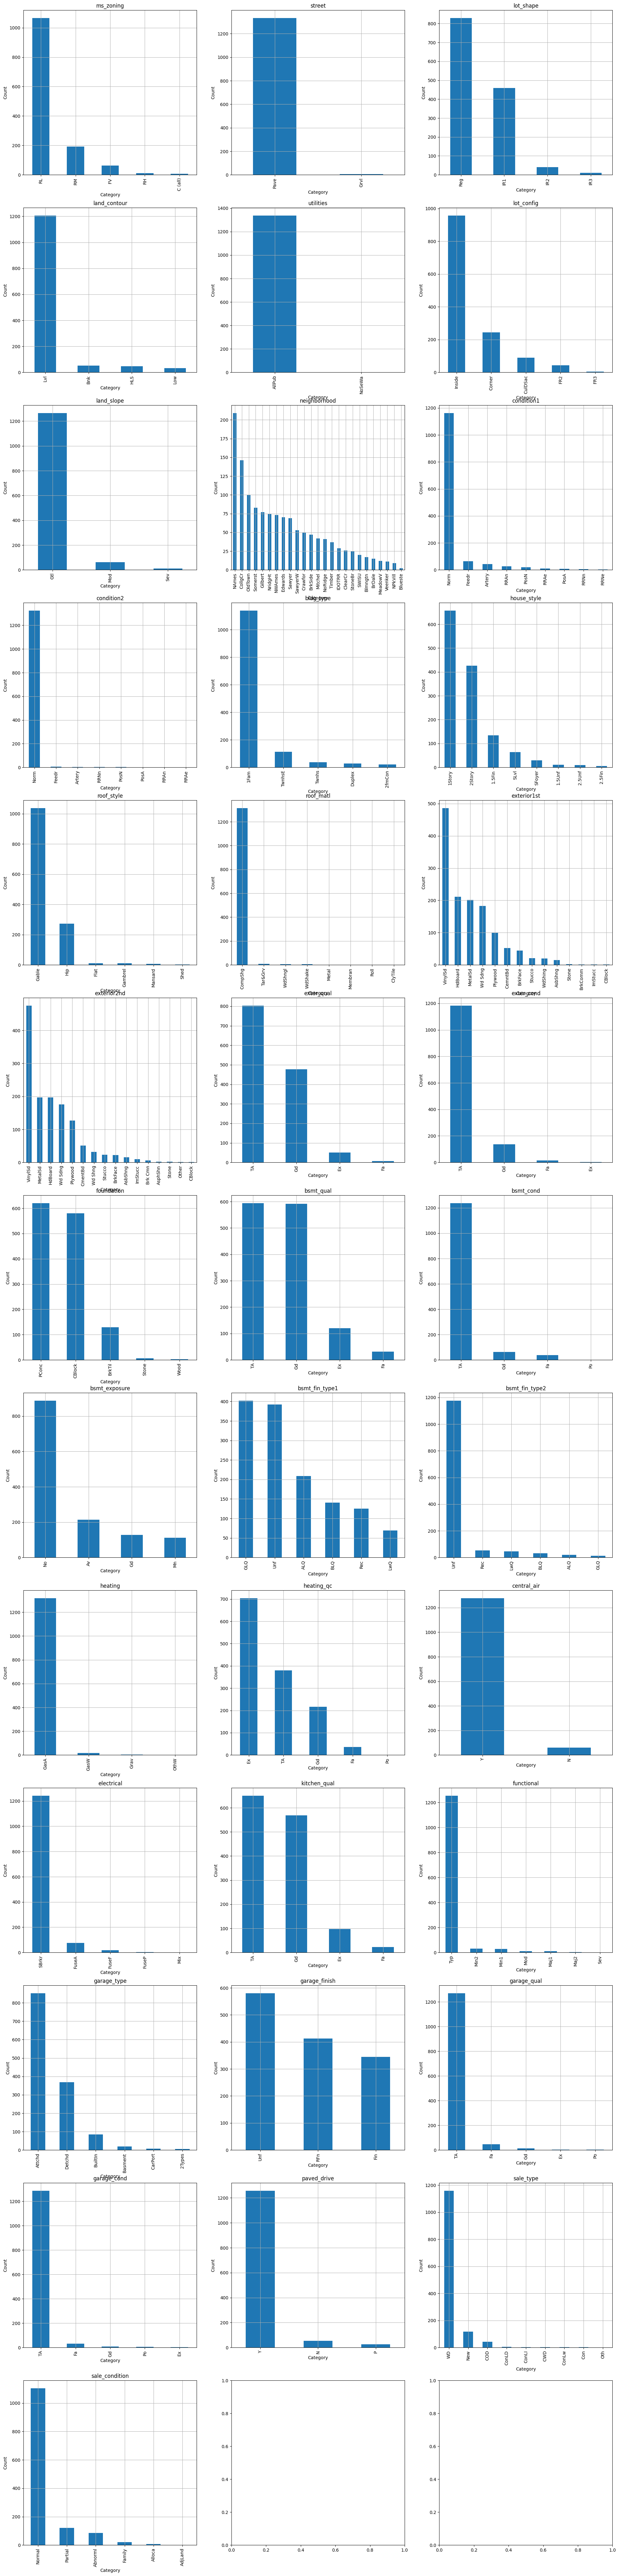

In [18]:
num_categorical_columns = len(categorical_columns)

num_col_cat_columns = 3
num_rows_cat_columns = (num_categorical_columns // num_col_cat_columns) \
    if num_categorical_columns % num_col_cat_columns == 0 \
    else (num_categorical_columns // num_col_cat_columns + 1)

# print(num_categorical_columns)
# print(num_col_cat_columns)
# print(num_rows_cat_columns)

fig, axes = plt.subplots(
    nrows=num_rows_cat_columns,
    ncols=num_col_cat_columns,
    figsize=(num_col_cat_columns * 8, num_rows_cat_columns * 8)
)
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    df_full[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Count')
    axes[i].grid(True)

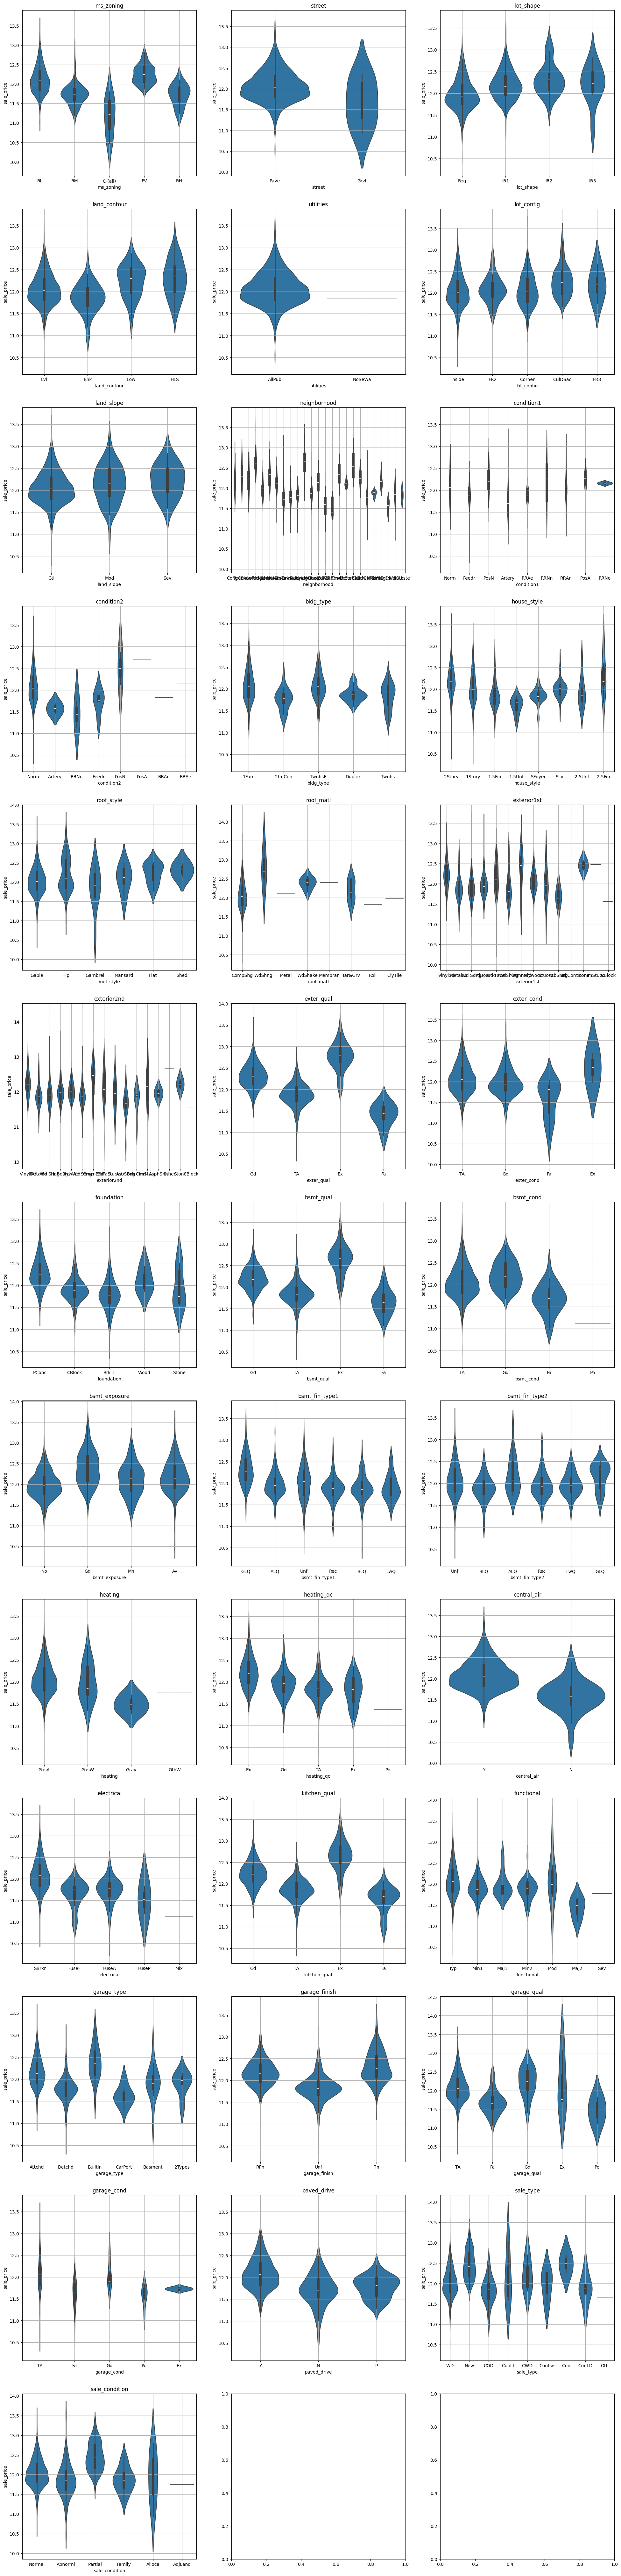

In [19]:
fig, axes = plt.subplots(
    nrows=num_rows_cat_columns,
    ncols=num_col_cat_columns,
    figsize=(num_col_cat_columns * 8, num_rows_cat_columns * 8)
)
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.violinplot(data=df_full, x=col, y='sale_price', ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(True)

plt.show()

In [20]:
df_full[numerical_columns].describe()

ms_sub_class       lot_area  overall_qual  overall_cond   year_built  \
count   1338.000000    1338.000000   1338.000000   1338.000000  1338.000000   
mean      56.136024   10706.294469      6.219731      5.596413  1973.029148   
std       41.252576   10336.621126      1.324472      1.078124    29.563540   
min       20.000000    1300.000000      2.000000      2.000000  1880.000000   
25%       20.000000    7744.000000      5.000000      5.000000  1956.000000   
50%       50.000000    9600.000000      6.000000      5.000000  1976.000000   
75%       70.000000   11760.750000      7.000000      6.000000  2001.000000   
max      190.000000  215245.000000     10.000000      9.000000  2010.000000   

       year_remod_add  mas_vnr_area  bsmt_fin_sf1  bsmt_fin_sf2  bsmt_unf_sf  \
count     1338.000000   1338.000000   1338.000000   1338.000000  1338.000000   
mean      1985.668909    110.360239    464.234679     49.218236   582.494768   
std         20.296463    185.604816    458.792420    166.196584   439.950528   
min       1950.000000      0.000000      0.000000      0.000000     0.000000   
25%       1968.000000      0.000000      0.000000      0.000000   248.000000   
50%       1994.500000      0.000000    413.000000      0.000000   489.000000   
75%       2004.000000    174.000000    733.000000      0.000000   815.750000   
max       2010.000000   1600.000000   5644.000000   1474.000000  2336.000000   

       ...  wood_deck_sf  open_porch_sf  enclosed_porch  3_ssn_porch  \
count  ...   1338.000000    1338.000000     1338.000000  1338.000000   
mean   ...     99.384903      47.782511       21.263827     3.585949   
std    ...    127.537065      65.362562       60.843964    30.224622   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      6.000000      28.000000        0.000000     0.000000   
75%    ...    174.500000      70.000000        0.000000     0.000000   
max    ...    857.000000     547.000000      552.000000   508.000000   

       screen_porch    pool_area      misc_val      mo_sold      yr_sold  \
count    1338.00000  1338.000000   1338.000000  1338.000000  1338.000000   
mean       16.43423     3.010463     42.932735     6.331839  2007.805680   
std        58.05159    41.961337    508.056255     2.699437     1.330691   
min         0.00000     0.000000      0.000000     1.000000  2006.000000   
25%         0.00000     0.000000      0.000000     5.000000  2007.000000   
50%         0.00000     0.000000      0.000000     6.000000  2008.000000   
75%         0.00000     0.000000      0.000000     8.000000  2009.000000   
max       480.00000   738.000000  15500.000000    12.000000  2010.000000   

        sale_price  
count  1338.000000  
mean     12.063498  
std       0.376846  
min      10.471978  
25%      11.813037  
50%      12.034697  
75%      12.301387  
max      13.534474  

[8 rows x 36 columns]

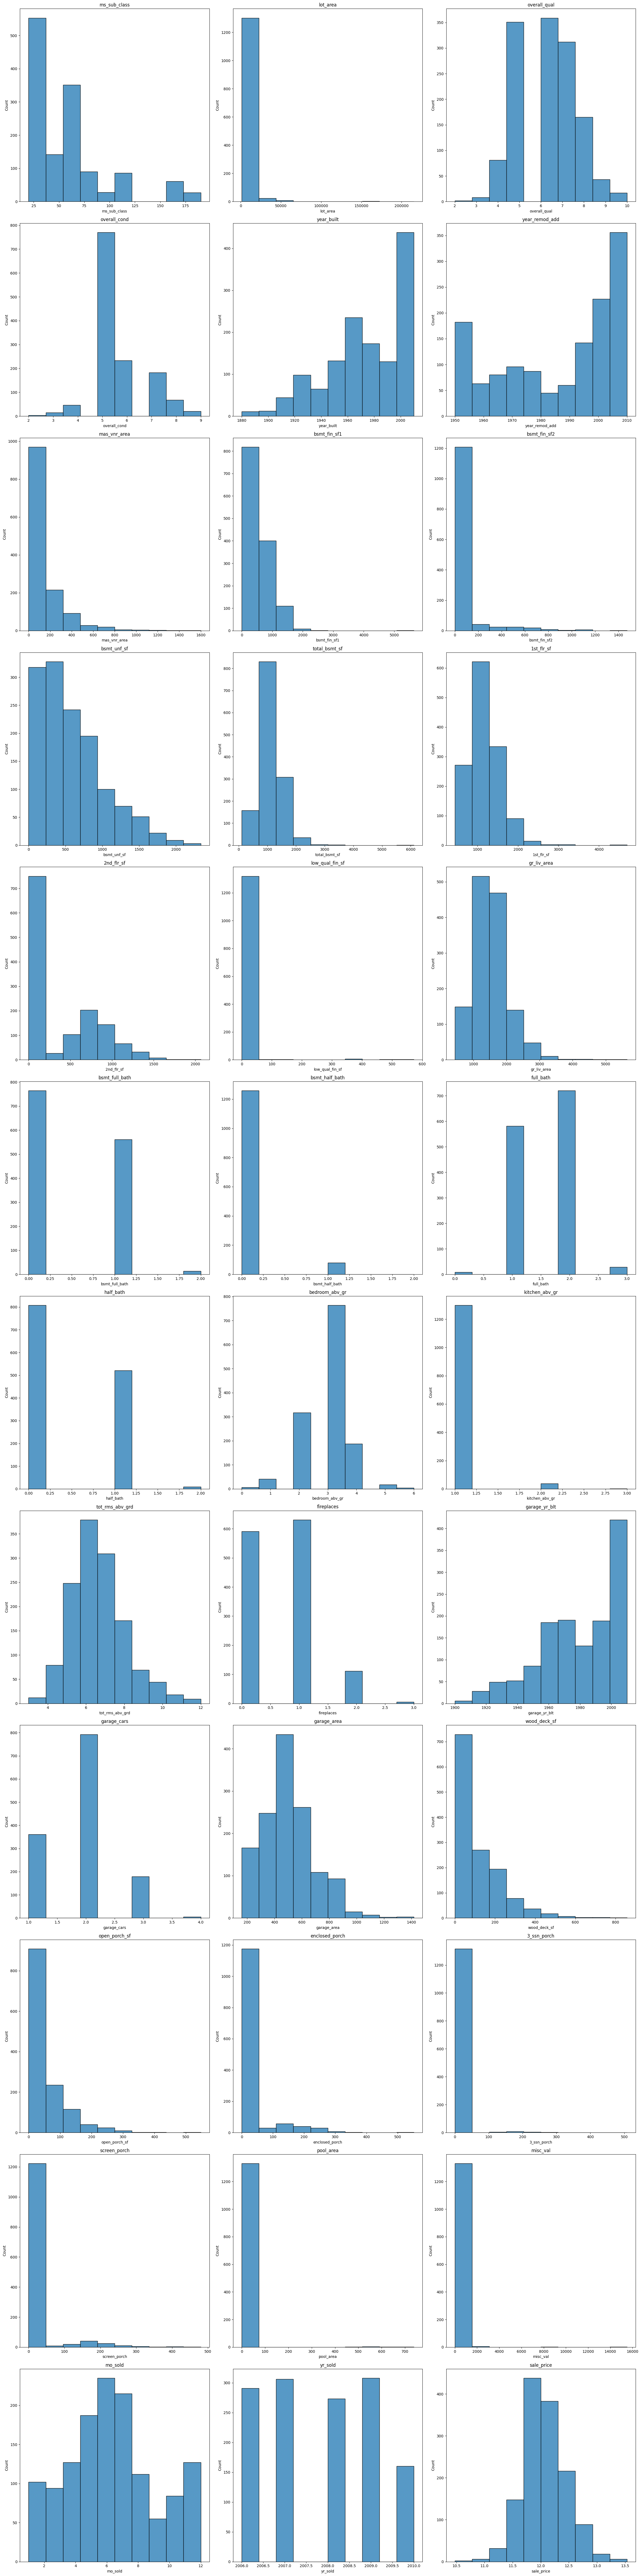

In [21]:
num_numerical_columns = len(numerical_columns)

num_col_num_columns = 3
num_rows_num_columns = (num_numerical_columns // num_col_num_columns) \
    if num_numerical_columns % num_col_num_columns == 0 \
    else (num_numerical_columns // num_col_num_columns + 1)

fig, axes = plt.subplots(
    nrows=num_rows_num_columns,
    ncols=num_col_num_columns,
    figsize=(num_col_num_columns * 8, num_rows_num_columns * 8)
)
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df_full, x=col, bins=10, kde=False, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

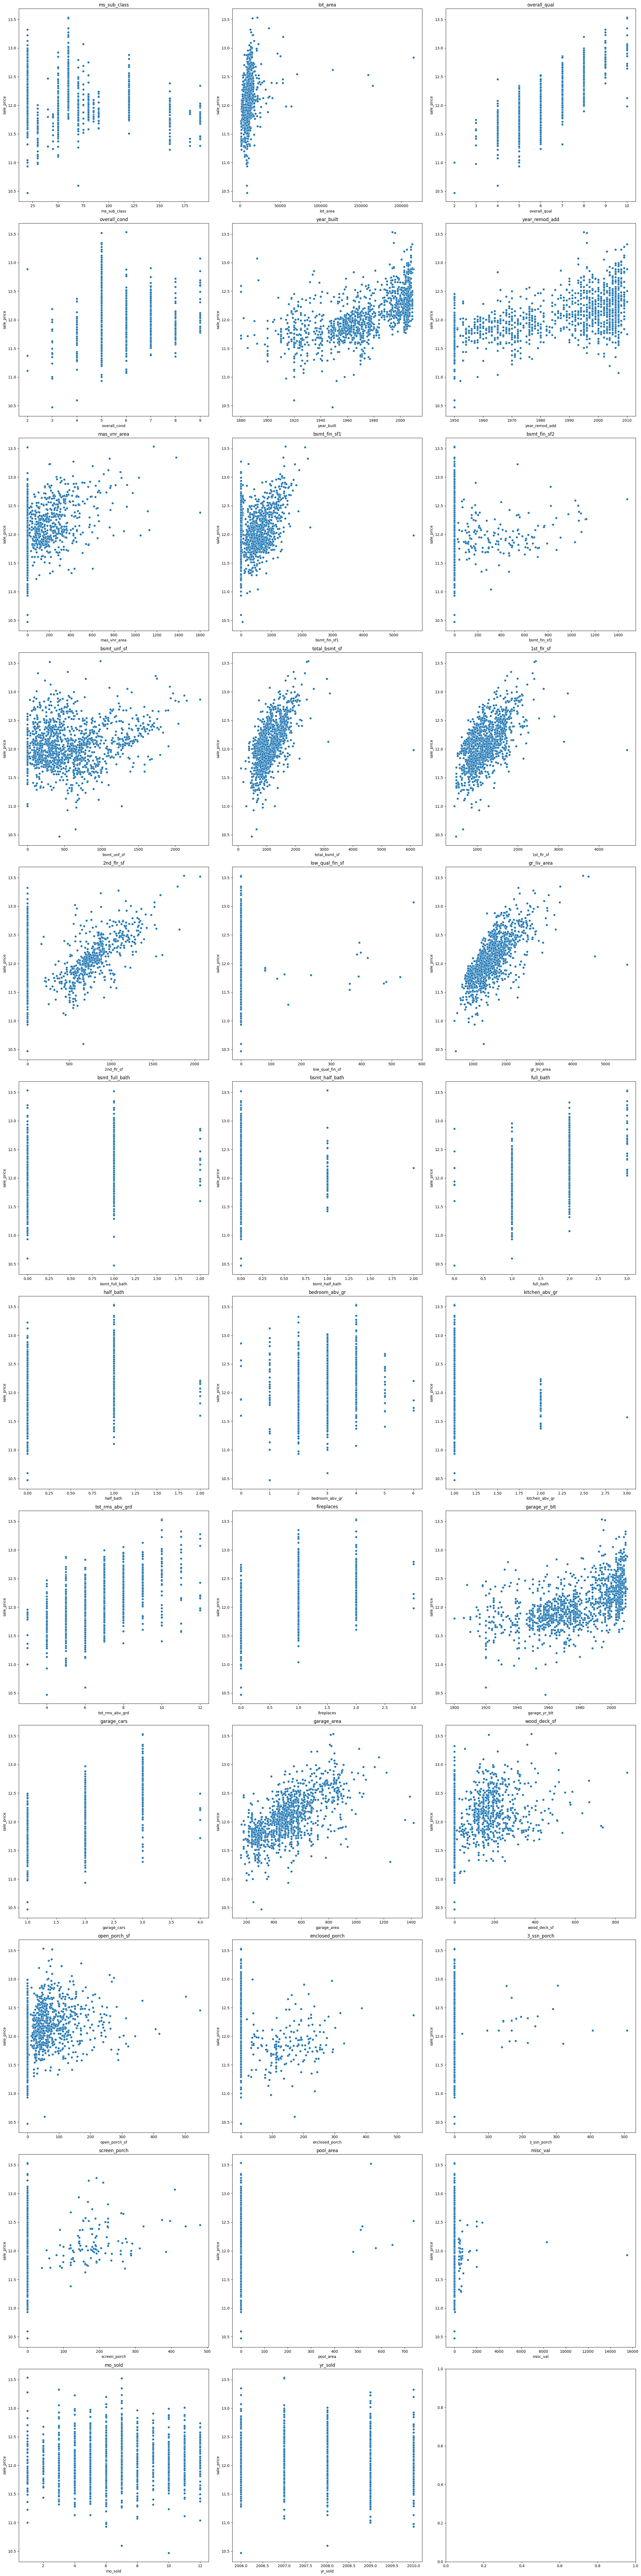

In [22]:
numerical_columns_without_sale_price = numerical_columns[numerical_columns != 'sale_price']
len_numerical_columns_without_sale_price = len(numerical_columns_without_sale_price)

num_rows_cat_columns_2 = (len_numerical_columns_without_sale_price // num_col_cat_columns) \
    if len_numerical_columns_without_sale_price % num_col_cat_columns == 0 \
    else (len_numerical_columns_without_sale_price // num_col_cat_columns + 1)

fig, axes = plt.subplots(
    nrows=num_rows_cat_columns_2,
    ncols=num_col_cat_columns,
    figsize=(num_col_cat_columns * 8, num_rows_cat_columns_2 * 8)
)
axes = axes.flatten()

for i, col in enumerate(numerical_columns_without_sale_price):
  sns.scatterplot(data=df_full, x=col, y='sale_price', ax=axes[i])
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

### Target column

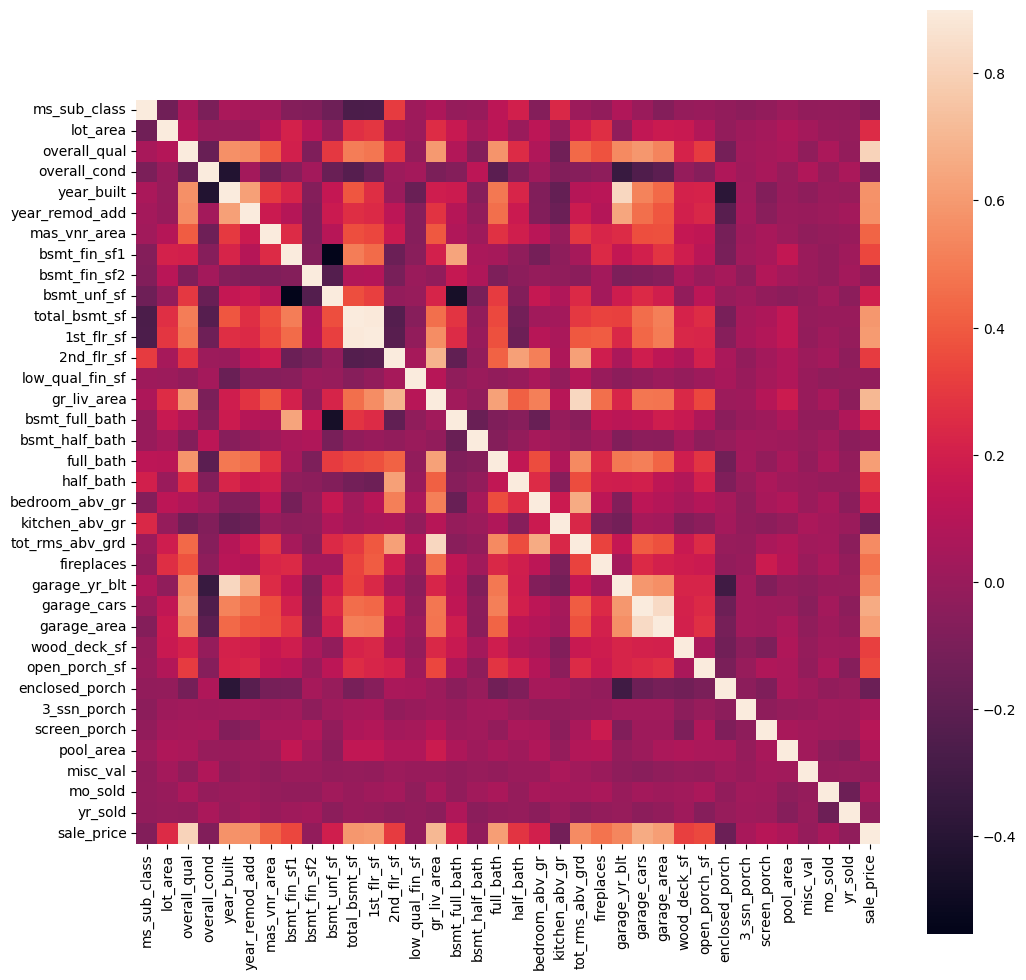

In [23]:
corrmat = df_full[numerical_columns].corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.9, square=True);

<Axes: title={'center': 'Correlation between SalePrice and other attributes'}>

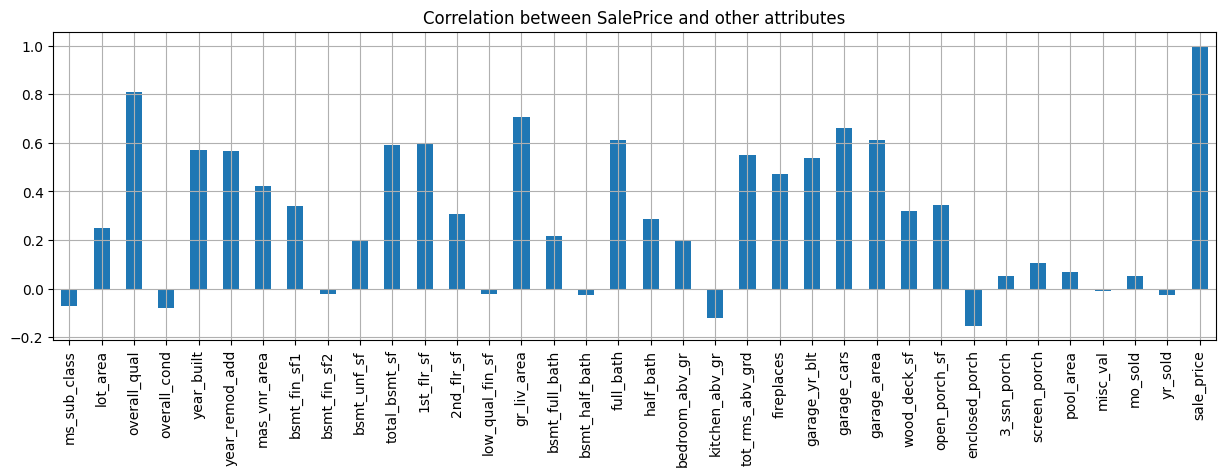

In [24]:
corrmat['sale_price'].plot(
    kind='bar',
    figsize=(15,4),
    title='Correlation between SalePrice and other attributes',
    grid=True
)

In [25]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text

In [26]:
'sale_price' in df_full.columns

True

In [27]:
TARGET_COLUMN = 'sale_price'

y = df_full[TARGET_COLUMN]
del df_full[TARGET_COLUMN]

In [34]:
dv = DictVectorizer(sparse=False)
X_dv = dv.fit_transform(df_full.to_dict(orient='records'))


tree = DecisionTreeRegressor(random_state=1, max_depth=3)
tree.fit(X_dv, y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [35]:
print(export_text(tree, feature_names=list(dv.get_feature_names_out())))

|--- overall_qual <= 6.50
|   |--- gr_liv_area <= 1378.50
|   |   |--- total_bsmt_sf <= 969.50
|   |   |   |--- value: [11.66]
|   |   |--- total_bsmt_sf >  969.50
|   |   |   |--- value: [11.88]
|   |--- gr_liv_area >  1378.50
|   |   |--- garage_cars <= 1.50
|   |   |   |--- value: [11.86]
|   |   |--- garage_cars >  1.50
|   |   |   |--- value: [12.07]
|--- overall_qual >  6.50
|   |--- overall_qual <= 7.50
|   |   |--- gr_liv_area <= 1822.00
|   |   |   |--- value: [12.15]
|   |   |--- gr_liv_area >  1822.00
|   |   |   |--- value: [12.38]
|   |--- overall_qual >  7.50
|   |   |--- overall_qual <= 8.50
|   |   |   |--- value: [12.50]
|   |   |--- overall_qual >  8.50
|   |   |   |--- value: [12.83]



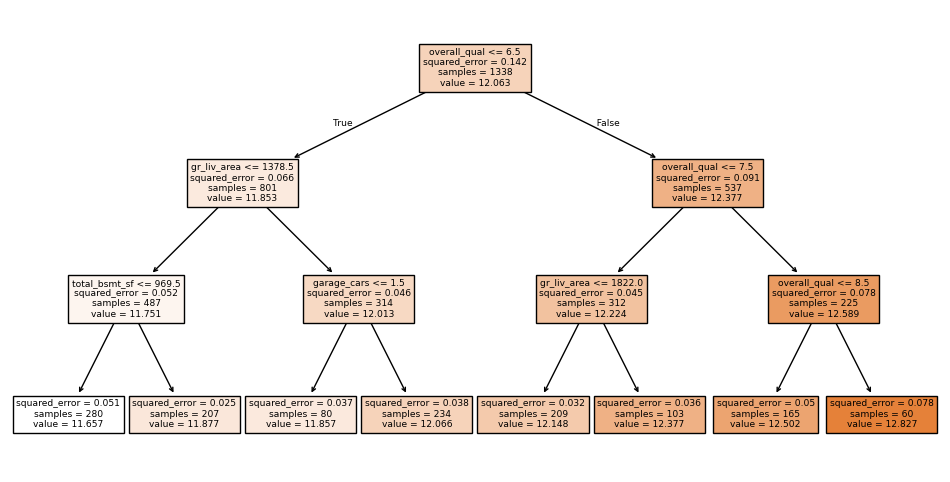

In [40]:
plt.figure(figsize=(12,6))
anotations = plot_tree(tree, filled=True, feature_names=list(dv.get_feature_names_out()))
plt.show()

In [63]:
feature_importance  = [ item for item in zip(list(dv.get_feature_names_out()), tree.feature_importances_) ]
feature_importance_sorted = sorted(feature_importance, key=lambda x: x[1], reverse=True)


In [62]:
for item in feature_importance_sorted[:5]:
    print(item)

('overall_qual', 0.8140525220445017)
('gr_liv_area', 0.12377623468330493)
('total_bsmt_sf', 0.042808386338044964)
('garage_cars', 0.019362856934148243)
('1st_flr_sf', 0.0)
